In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
pd.set_option('display.max_columns',None)

In [44]:
train_df=pd.read_csv('Tra_add_NaN_final.csv',index_col='application_key')
# from scipy import stats
# z = np.abs(stats.zscore(train_df))
# threshold = 3
# # print(np.where(z > 3))
# train_df=train_df[(z<3).all(axis=1)]
X=train_df.iloc[:,:-1]
Y=train_df.iloc[:,-1]
train_df.head()
# (X.shape,Y.shape)
# train_df.columns


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
application_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
230032,1696.0,1.6541,40369.000000,18414.0,1780.0,6423.0,3067.0,123875.0,216152.0,94.78,8987.180,3700.00,72.25,1462.0,61.0,4532.0,1095.0,625.0,1.1667,8.0,10.0,4.0,1.0,0.08696,10.0,0.63899,0.0,1.0,156.327,0.0,0.000,6337.0,3.0,4.0,7422.0,0.0
230033,1846.0,0.8095,18234.000000,13664.0,1780.0,765.0,1931.0,42613.0,216152.0,74.25,953.060,953.06,4.80,1028.0,30386.0,2281.0,2829.0,169.0,0.4167,8.0,0.0,2.0,0.0,0.00000,13.0,0.63836,1.0,0.0,99.129,0.0,0.000,10805.0,0.0,0.0,4198.0,1.0
230034,1745.0,0.4001,34097.436013,2536.0,1780.0,2977.5,4090.0,76109.0,216152.0,59.69,3974.425,3700.00,40.44,1472.0,669.0,4623.0,3772.0,300.0,25.0833,1.0,3.0,1.0,0.0,0.00000,1.0,1.00000,0.0,0.0,29.290,0.0,0.000,5311.0,0.0,0.0,5293.0,1.0
230035,1739.0,0.2193,20316.000000,37013.0,1780.0,0.0,0.0,84235.0,216152.0,59.69,0.000,3700.00,0.00,1308.0,91.0,5992.0,2829.0,215.0,10.3333,3.0,3.0,2.0,0.0,0.15385,3.0,0.53241,1.0,0.0,96.272,0.0,0.000,33377.0,0.0,0.0,3316.0,0.0
230036,1787.0,0.0118,7987.000000,4696.0,1780.0,2257.0,27815.0,123875.0,524848.0,20.51,796.670,3700.00,28.72,801.0,487.0,2707.0,2829.0,158.0,0.9167,2.0,3.0,2.0,0.0,0.00000,1.0,0.92665,1.0,0.0,115.019,0.0,0.225,16439.0,0.0,0.0,4562.0,0.0


In [45]:
X.shape

(71526, 35)

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
   X ,Y , test_size=0.33, random_state=42)
X_train.shape, Y_train.shape, X_test.shape

((47922, 35), (47922,), (23604, 35))

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [14]:
# def modelfit(alg, dtrain, dtest, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
#     #Fit the algorithm on the data
#     alg.fit(dtrain[predictors], dtrain['Disbursed'])
        
#     #Predict training set:
#     dtrain_predictions = alg.predict(dtrain[predictors])
#     dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
#     #Perform cross-validation:
#     if performCV:
#         cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    
#     #Print model report:
#     print ("\nModel Report")
#     print ("Accuracy : %.4g") % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)
#     print ("AUC Score (Train): %f") % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
    
#     if performCV:
#         print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g") % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
                
#     #Print Feature Importance:
#     if printFeatureImportance:
#         feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
#         feat_imp.plot(kind='bar', title='Feature Importances')
#         plt.ylabel('Feature Importance Score')

In [15]:
# #Choose all predictors except target & IDcols
# predictors =X# [x for x in train.columns if x not in [target, IDcol]]
# gbm0 = GradientBoostingClassifier(random_state=10)
# modelfit(gbm0, train_df.iloc[:1500,:], train_df.iloc[1500:2000,:], predictors,printFeatureImportance=False)

In [48]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [50]:
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], Y[:offset]
X_test, y_test = X[offset:], Y[offset:]
params = {'n_estimators': 100, 'max_depth': 9, 'min_samples_split': 1000,
          'learning_rate': 0.2, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

MSE: 0.1443


Text(0,0.5,'Deviance')

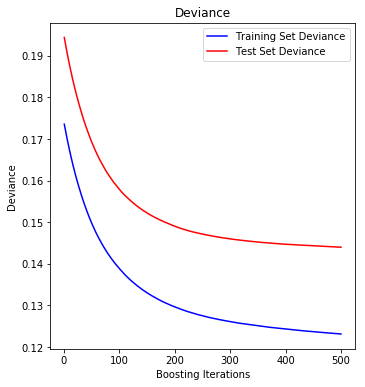

In [24]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [29]:
# colm=[i for i in range(48)]
# train_df.columns=colm

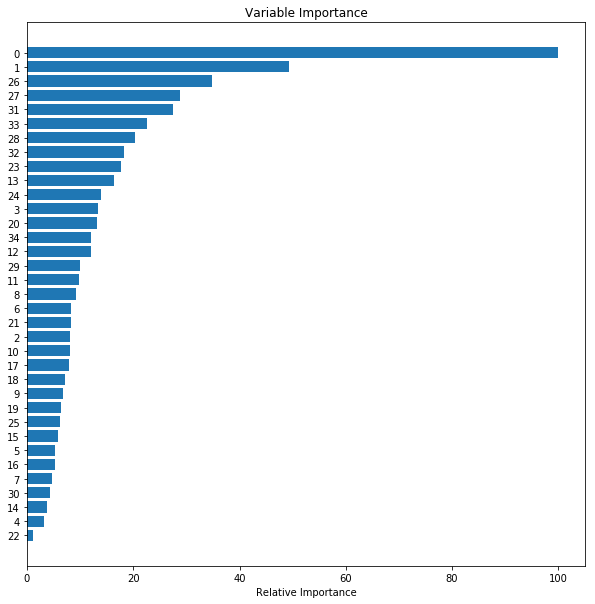

In [25]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(10,10))
ax=plt.subplot(1, 1,1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
fig=plt.figure(figsize=(15,15))
plt.show()

In [15]:
# train_df.describe()

In [26]:
sorted_idx

array([22,  4, 14, 30,  7, 16,  5, 15, 25, 19,  9, 18, 17, 10,  2, 21,  6,
        8, 11, 29, 12, 34, 20,  3, 24, 13, 23, 32, 28, 33, 31, 27, 26,  1,
        0], dtype=int64)

In [25]:
imp_col=sorted_idx[-11:]

In [62]:
data=pd.read_csv('Training_dropped.csv',index_col='application_key')
Y1=data.iloc[:,-1]

In [63]:
data.columns=colm

In [65]:
data=data[imp_col]

In [67]:
data=pd.concat([data,Y1],axis=1)

In [70]:
data.to_csv('traning_gbm_276.csv')

In [60]:
imp_col

array([ 9, 39, 23, 24,  6, 33, 17, 41, 46,  1,  0], dtype=int64)

In [47]:
train_df=train_df[imp_col]

In [49]:
train_df=pd.concat([train_df,Y],axis=1)

In [51]:
# train_df.head()

In [52]:
train_df.to_csv('Training_GBM_filtered.csv')

In [53]:
lead_df=pd.read_csv('lead_board_cleaned.csv',index_col='application_key')
lead_df.columns=colm[:-1]
lead_df=lead_df[imp_col]


In [56]:
lead_df.shape,train_df.shape

((25000, 11), (80000, 12))

In [57]:
lead_df.to_csv('lead_GBM_filtered.csv')

In [58]:
lead_df.columns

Int64Index([9, 39, 23, 24, 6, 33, 17, 41, 46, 1, 0], dtype='int64')

In [59]:
train_df.columns

Index([9, 39, 23, 24, 6, 33, 17, 41, 46, 1, 0, 'default_ind'], dtype='object')

In [33]:
new=pd.read_csv('Training_Missing_removed.csv',index_col='application_key')

mvar1          0
mvar2          0
mvar3          0
mvar4          0
mvar5          0
mvar6          0
mvar7          0
mvar8          0
mvar9          0
mvar10         0
mvar11         0
mvar12         0
mvar13         0
mvar14         0
mvar15         0
mvar16         0
mvar17         0
mvar18         0
mvar19         0
mvar20         0
mvar21         0
mvar22         0
mvar23         0
mvar24         0
mvar25         0
mvar26         0
mvar27         0
mvar28         0
mvar29         0
mvar30         0
mvar31         0
mvar32         0
mvar33         0
mvar34         0
mvar35         0
mvar36         0
mvar37         0
mvar38         0
mvar39         0
mvar40         0
mvar41         0
mvar42         0
mvar43         0
mvar44         0
mvar45         0
mvar46         0
mvar47         0
default_ind    0
dtype: int64

10
15
20
25
30
35
40
45
50
55
60
65
70
75


range(10, 80, 10)